In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:

yf.pdr_override()
df = pdr.get_data_yahoo('AAPL', start = "2010-01-01", end = "2022-01-01")

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [3]:
df = df.reset_index()

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [5]:
df = df.drop(['Adj Close', 'Date'], axis=1)

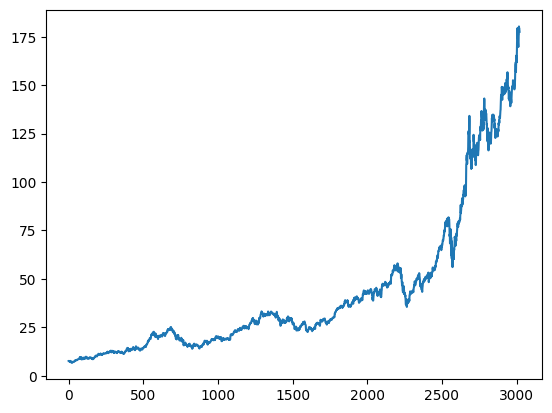

In [6]:
plt.plot(df.Close)

In [7]:
weekma = df.Close.rolling(100).mean()

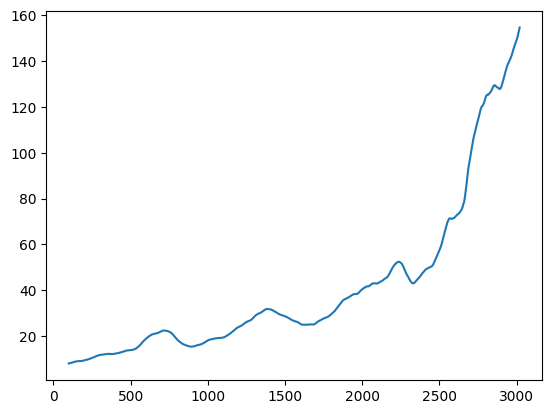

In [8]:
plt.plot(weekma)

In [9]:
df.shape

(3021, 5)

In [10]:
#Splitting into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(907, 1)


In [11]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [12]:
data_testing.tail()

,Close
3016,180.330002
3017,179.289993
3018,179.380005
3019,178.199997
3020,177.570007


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [14]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train.shape

(2014, 100, 1)

In [17]:
y_train.shape

(2014,)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
63/63 [==============================] - 15s 171ms/step - loss: 0.0410
Epoch 2/100
63/63 [==============================] - 15s 230ms/step - loss: 0.0087
Epoch 3/100
63/63 [==============================] - 13s 203ms/step - loss: 0.0068
Epoch 4/100
63/63 [==============================] - 12s 193ms/step - loss: 0.0068
Epoch 5/100
63/63 [==============================] - 12s 191ms/step - loss: 0.0065
Epoch 6/100
63/63 [==============================] - 13s 199ms/step - loss: 0.0060
Epoch 7/100
63/63 [==============================] - 12s 198ms/step - loss: 0.0056
Epoch 8/100
63/63 [==============================] - 12s 196ms/step - loss: 0.0057
Epoch 9/100
63/63 [==============================] - 12s 196ms/step - loss: 0.0058
Epoch 10/100
63/63 [==============================] - 12s 197ms/step - loss: 0.0046
Epoch 11/100
63/63 [==============================] - 13s 203ms/step - loss: 0.0049
Epoch 12/100
63/63 [==============================] - 14s 219ms/step - loss: 0.0045
E

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("stock_model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("weights.h5")

In [24]:
model.save('stock_model.h5')

In [25]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [26]:
past_100_days = data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [29]:
inputs = scaler.transform(final_df)
inputs

array([[0.8904703 ],
       [0.89539024],
       [0.90750555],
       ...,
       [4.24394928],
       [4.21492156],
       [4.19942407]])

In [30]:
inputs.shape

(1007, 1)

In [31]:
x_test = [] 
y_test = []

for i in range(100, (inputs.shape[0])):
    x_test.append(inputs[i-100: i])
    y_test.append(inputs[i,0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [33]:
y_predicted = (model.predict(x_test)) 

29/29 [==============================] - 2s 54ms/step


In [34]:
y_predicted.shape

(907, 1)

In [35]:
scaler.scale_

array([0.0245996])

In [36]:
scale = 1/0.0378916
scale 

26.391073483305007

In [37]:
y_predicted = scale * y_predicted
y_test = scale * y_test

In [38]:
y_test.shape

(907,)

In [39]:
y_predicted.shape

(907, 1)

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r', label = 'Original Price')
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()